# Loading training data

In [2]:
X = array[:,1:160]
Y = array[:,1]

In [3]:
import pandas as pd

# Convert NumPy array to DataFrame
Y_df = pd.DataFrame(Y)

# Display the first few rows
print(Y_df.head())



            0
0  311.923441
1  417.106804
2   460.99765
3  288.537714
4   271.01411


# data spliting

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1,random_state=100, shuffle=True)

# preprocessing

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
normalizer = preprocessing.Normalizer().fit(X_train)
X_train=normalizer.transform(X_train)
X_test=normalizer.transform(X_test)

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
normalizer = preprocessing.Normalizer().fit(X)
X = normalizer.transform(X)

# parameters optimizing

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [32],'gamma': [0.0032]}
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 32, 'gamma': 0.0032}


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load training data
DE = pd.read_excel('to_predict_1.xlsx')
array = DE.values
X = array[:,2:160]
Y = array[:,1]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=15, shuffle=True)

# Data transformation
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SVR model construction
SVM = SVR(kernel='rbf',C=10**3.2, epsilon=0.1, gamma=0.0032).fit(X_train, Y_train)
y_pred = SVM.predict((X_test))

Y_train_pred = SVM.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)
print("R^2 score on training data:", r2_train)

# Calculate R^2 score on test data
r2_test = r2_score(Y_test, y_pred)
print("R^2 score on test data:", r2_test)

# Plot parity plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot(Y_test, Y_test, color='red', linewidth=2)
plt.title('Parity Plot for Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# modeling

# Test for consistency in accuracy validation (Changing Random State)

R2 on test set:0.166220
R2 on test set:0.164380
R2 on test set:0.164348
R2 on test set:0.159799
R2 on test set:0.181141
R2 on test set:0.196542
R2 on test set:0.193494
R2 on test set:0.173628
R2 on test set:0.187255
R2 on test set:0.132665
R^2: 17.22915%, MSE: 28311.68302


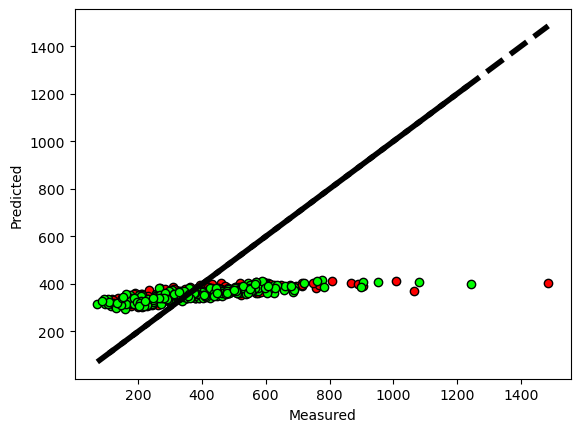

In [13]:
from sklearn import metrics
ytests = []
ypreds = []

fig, ax = plt.subplots()
for i in range(0,150,15):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1,random_state=i, shuffle=True)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    normalizer = preprocessing.Normalizer().fit(X_train)
    X_train=normalizer.transform(X_train)
    X_test=normalizer.transform(X_test)
    param_grid = {'C': [1],'gamma': [0.1]}
    grid = GridSearchCV(SVR(), param_grid=param_grid, cv=10)
    grid.fit(X_train, y_train)
    SVM = SVR(**grid.best_params_).fit(X_train, y_train)
    predict_y = SVM.predict(X_test)
    predict1_y = SVM.predict(X_train)
    mse = mean_squared_error(y_test, predict_y)
    rmse = np.sqrt(mse)
    print("R2 on test set:%f" % SVM.score(X_test, y_test))
    ytests += list(y_test)
    ypreds += list(predict_y)
    # plotting lowest score
    if i == 15:
        ax.scatter(y_test, predict_y, color=(1,0,0), edgecolors=(0, 0, 0))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    # plotting highest score
    if i == 120:
        ax.scatter(y_test, predict_y, color=(0,1,0), edgecolors=(0, 0, 0))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    # plotting mid point
    #if i == 30:
        #ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
        #ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)    
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')    
plt.show()

ValueError: x and y must be the same size

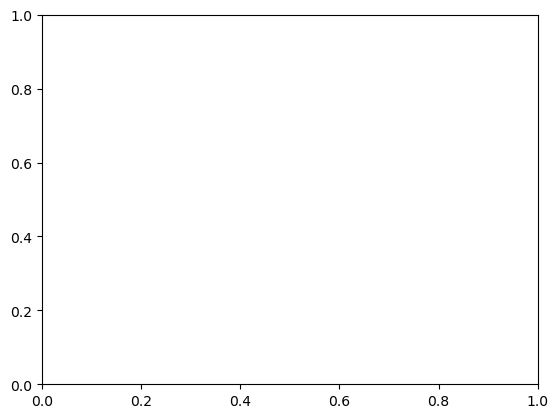

In [25]:
# Assuming you have your data stored in X and y variables
# X should be a 2D array or DataFrame containing your features
# y should be a 1D array or Series containing your target variable



# Training the SVR model
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_scaled = svr_regressor.predict((X_test))

# Rescaling the predictions


# Plotting the results (if desired)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Model')
plt.legend()
plt.show()


R^2 score on training data: 0.9599325218933964
R^2 score on test data: 0.8924475691058975


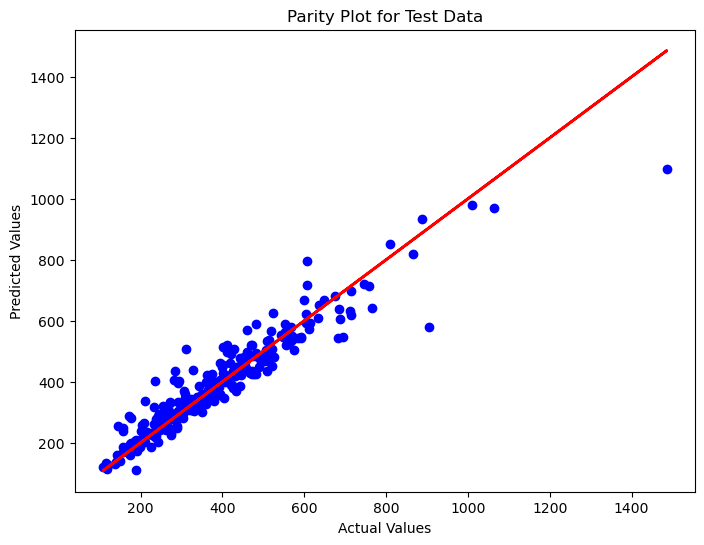

In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load training data
DE = pd.read_excel('to_predict_1.xlsx')
array = DE.values
X = array[:,2:160]
Y = array[:,1]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=15, shuffle=True)

# Data transformation
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# SVR model construction
SVM = SVR(kernel='rbf',C=10**3.2, epsilon=0.1, gamma=0.0032).fit(X_train, Y_train)
y_pred = SVM.predict((X_test))

Y_train_pred = SVM.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)
print("R^2 score on training data:", r2_train)

# Calculate R^2 score on test data
r2_test = r2_score(Y_test, y_pred)
print("R^2 score on test data:", r2_test)

# Plot parity plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot(Y_test, Y_test, color='red', linewidth=2)
plt.title('Parity Plot for Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

# Concatenate X_train and X_test along with Y_train
X_combined = np.concatenate((X_train, X_test), axis=0)
Y_combined = np.concatenate((Y_train, Y_test), axis=0)

# Perform 10-fold cross-validation
scores_combined = cross_val_score(SVM, X_combined, Y_combined, cv=10, scoring='r2')
print("R^2 scores for each fold (combined data):", scores_combined)
print("Mean R^2 score (combined data):", np.mean(scores_combined))





R^2 scores for each fold (combined data): [0.92789385 0.88424485 0.91631961 0.88700036 0.91306159 0.92090123
 0.88380895 0.91896313 0.90176994 0.89244757]
Mean R^2 score (combined data): 0.9046411081687022


In [32]:
import pandas as pd
from sklearn.model_selection import KFold

# Initialize lists to store predictions and actual values for each fold
predictions_list = []
actual_values_list = []

# Initialize cross-validation with 10 folds
kf = KFold(n_splits=10)

# Iterate over each fold
for train_index, test_index in kf.split(X_combined):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]
    
    # Fit the SVR model to the training data for this fold
    SVM_fold = SVR(kernel='rbf', C=10**3.2, epsilon=0.1, gamma=0.0032).fit(X_train_fold, Y_train_fold)
    
    # Make predictions on the test data for this fold
    Y_pred_fold = SVM_fold.predict(X_test_fold)
    
    # Append predictions and actual values to the lists
    predictions_list.extend(Y_pred_fold)
    actual_values_list.extend(Y_test_fold)

# Create a DataFrame with Y_test and Y_pred
df_results = pd.DataFrame({'Y_true': actual_values_list, 'Y_pred': predictions_list})

# Save the DataFrame to an Excel file
df_results.to_excel('predictions_all_folds.xlsx', index=False)


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values_list, predictions_list))
print("RMSE:", rmse)

# Calculate R2
r2 = r2_score(actual_values_list, predictions_list)
print("R^2:", r2)


RMSE: 58.966819397195316
R^2: 0.895745919799203


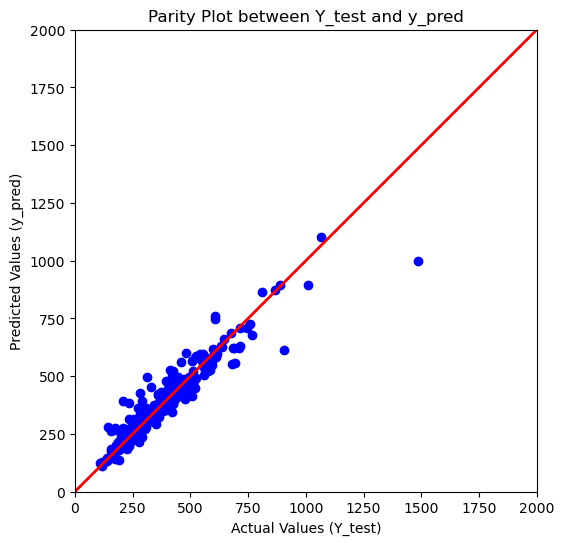

In [24]:
# Plot parity plot between Y_test and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([0, 2000], [0, 2000], color='red', linewidth=2)  # Plot the perfect prediction line
plt.title('Parity Plot between Y_test and y_pred')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.xlim(0, 2000)  # Set x-axis range from 0 to 2000
plt.ylim(0, 2000)  # Set y-axis range from 0 to 2000
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to maintain rectangle shape
plt.show()


In [25]:
import pandas as pd

# Create a DataFrame with Y_test and y_pred
df = pd.DataFrame({'Y_test': Y_test, 'y_pred': y_pred})

# Save the DataFrame to an Excel file
df.to_excel('predictions.xlsx', index=False)
